In [ ]:
import numpy as np
import pandas as pd
!pip install -q xlrd
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/adv.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

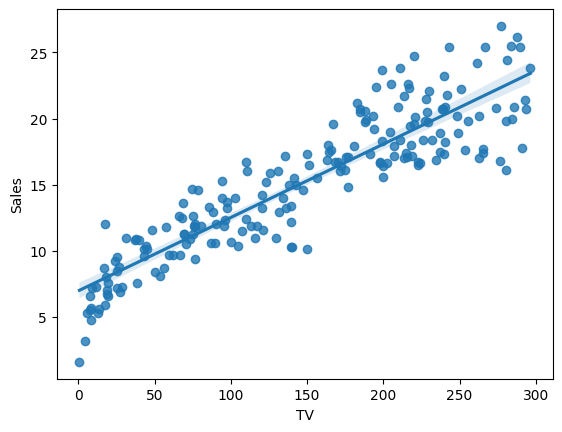

In [ ]:
sns.regplot(x = 'TV', y = 'Sales', data = df)
plt.show()

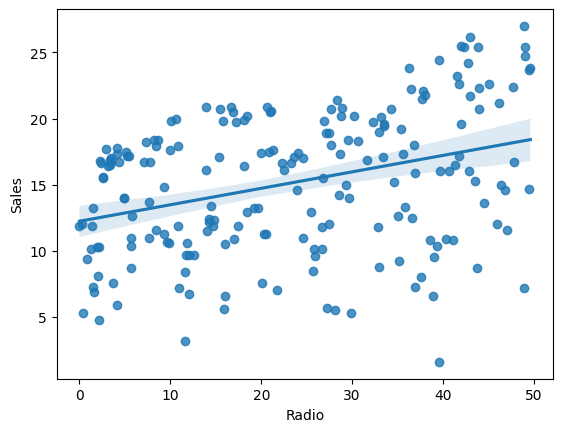

In [ ]:
sns.regplot(x = 'Radio', y = 'Sales', data = df)
plt.show()

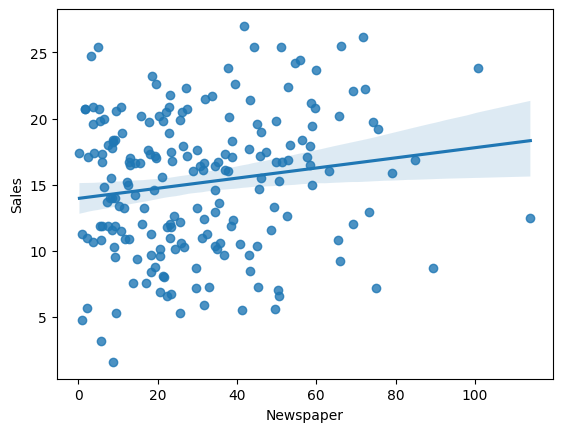

In [ ]:
sns.regplot(x = 'Newspaper', y = 'Sales', data = df)
plt.show()

<Figure size 1400x500 with 0 Axes>

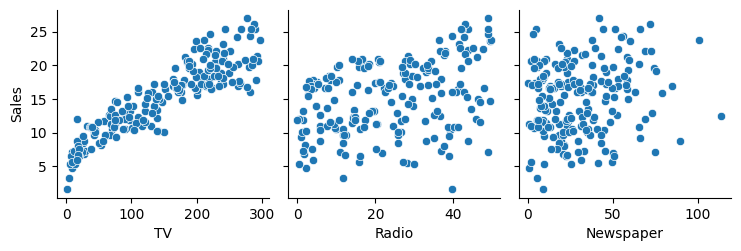

In [ ]:
plt.figure(figsize = [14,5])
sns.pairplot(data = df , x_vars = ['TV','Radio','Newspaper'], y_vars="Sales")

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

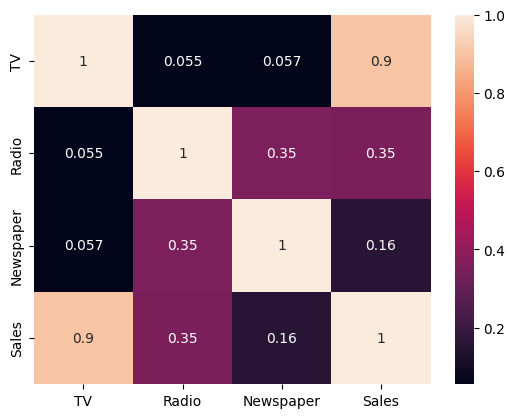

In [ ]:
sns.heatmap(df.corr(), annot = True , color = 'Red')

In [ ]:
import statsmodels
import statsmodels.api as sm
import sklearn

# **Creating Simple Regression Model**


Steps : 
*   Creating X and y
*   Creating train & Test sets (Ratio 70 to 30)
*   Training the model on training sets
*   Residual Analysis
*   Predict & Evalute the model (Training set,Test set)


# Step 1 : Creating X and y

In [ ]:

X = df['TV']
y = df['Sales']

# Step 2 : Creating train & Test sets (Ratio 70 to 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.70 , random_state=100)

In [ ]:
print(X_train.shape , X_test.shape)

(140,) (60,)


# Step 3 : Training the model on training sets

In [ ]:

# Command ‘add_constant’ so that statsmodels also fits an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [ ]:
# y = c + m1.X1
# y = c.const + m1.TV

*   **y = c + m1.X1**
*   **y = c.const + m1.TV**

In [ ]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [ ]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        16:10:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



* **R-squared is very high at 81.6%**
*   **Prob (F-statistic) is low**
*   **Combining these 2 statistics,We can coclude that the fit is not by chance**






In [ ]:
y_train_pred = lr_model.predict(X_train_sm)

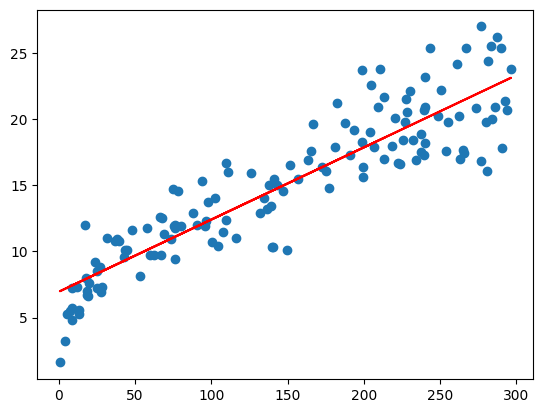

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train , y_train_pred , 'r')
plt.show()

## Step 4 : Residual Analysis

error = f (y_train , y_train_pred)

In [ ]:
res = y_train - y_train_pred

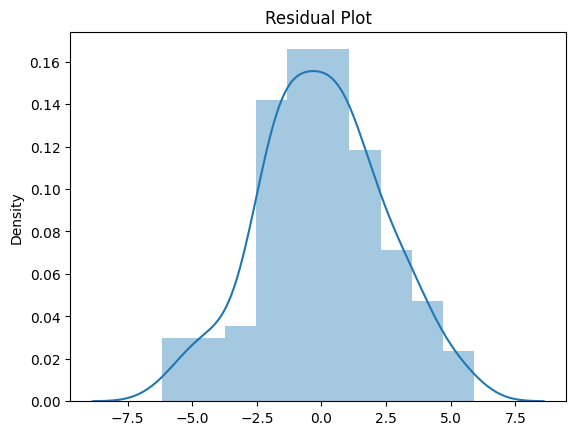

In [ ]:
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

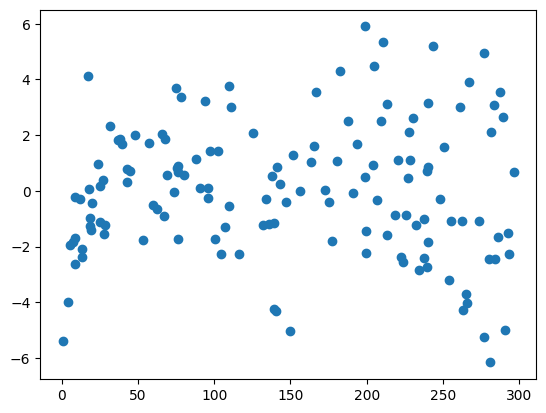

In [ ]:
# Checking for patterns in residuals if any
plt.scatter(X_train , res)
plt.show()

# Step 4 : Prediction & Evaluation on the Test Set

In [ ]:
# adding intercept on X_test
X_test_sm  = sm.add_constant(X_test)

In [ ]:
# Prediction on Test
y_test_pred = lr_model.predict(X_test_sm)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Evaluating the Model by R-squared on the test
r2 =  r2_score(y_true = y_test, y_pred = y_test_pred)
round(r2*100,2)

79.21

In [ ]:
# Evaluating the Model by R-squared on the training
r2_train =  r2_score(y_true = y_train, y_pred = y_train_pred)
round(r2_train*100,2)

81.58

Margin of tolerance is +/- 5%, So Model is stable based on the evaluation

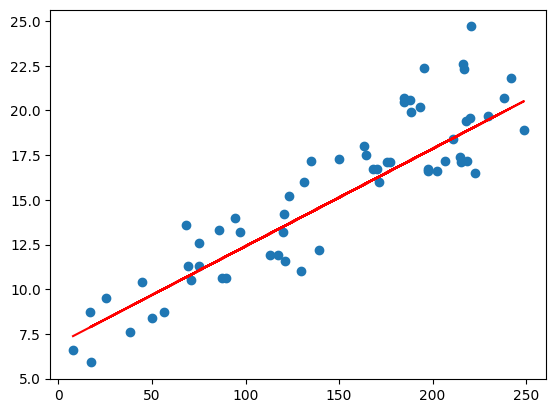

In [ ]:
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_pred, 'r')
plt.show()

# **Linear Regression Using Sklearn**

## Steps for Model building in Sklearn

* Create an object for linear regression
* Fit the model
* Making prediction
* Evaluating the Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1 : Create an object for linear regression

In [ ]:
lm = LinearRegression()

# Step 2 : Fit the model

In [ ]:
X_train.shape

(140,)

In [ ]:
# Reshapping the training data into array(n,1) to fit the model 
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [ ]:
X_train_lm.shape

(140, 1)

In [ ]:
lm.fit(X_train_lm , y_train)

LinearRegression()

# Step 3 : Making prediction

In [ ]:
# Checking the Parameters
print(lm.coef_ ,',', lm.intercept_)

[0.05454575] , 6.948683200001357


In [ ]:
# making Prediction
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Step 4 : Evaluating the Model

In [ ]:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662
